In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

path ="/content/drive/MyDrive/Colab Notebooks/winequality-red.csv"
df = pd.read_csv(path)


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
 # this is used to get a summary of a DataFrame's structure and information
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# this is used to count the number of missing values in each column of a DataFrame
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
df['quality'].value_counts()


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


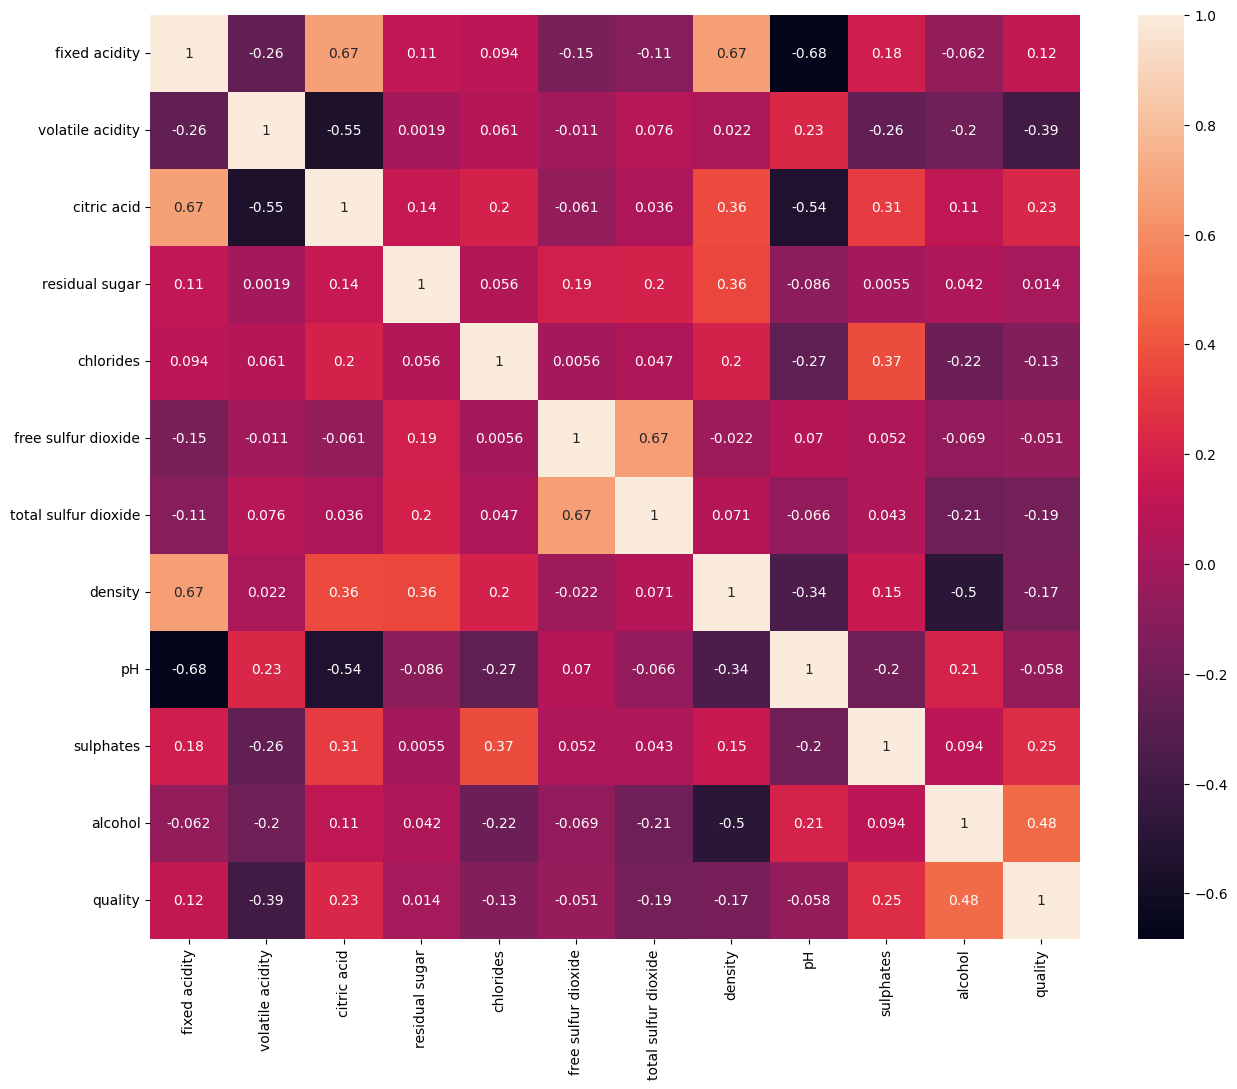

In [9]:
#corelation between features
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

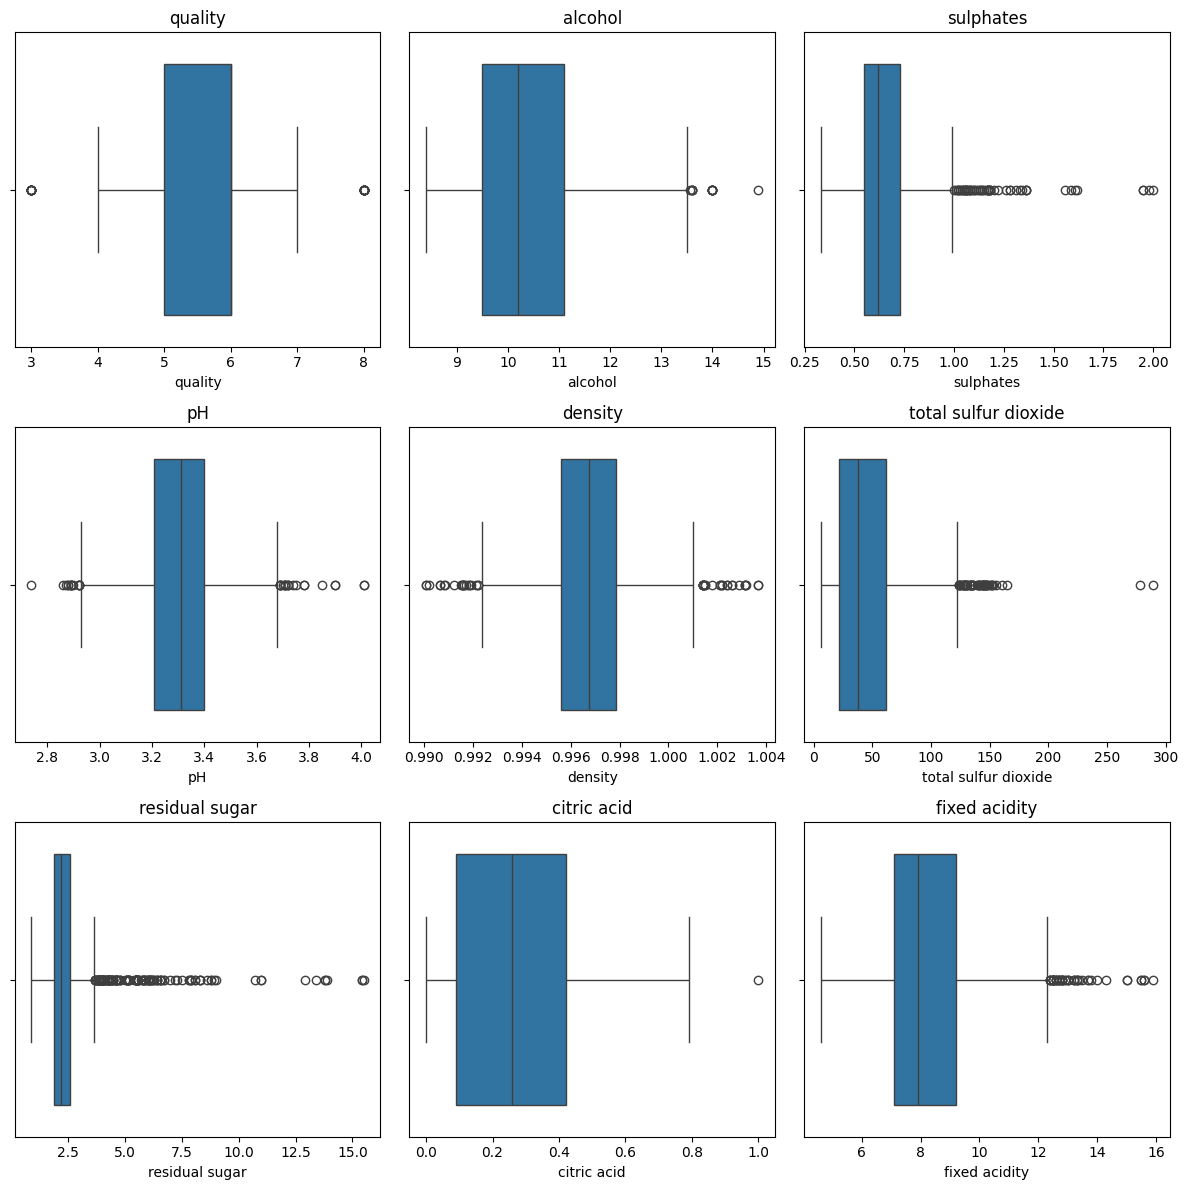

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired columns for boxplots
columns_to_plot = ['quality', 'alcohol', 'sulphates', 'pH', 'density',
                   'total sulfur dioxide', 'residual sugar', 'citric acid', 'fixed acidity']

# Create a larger figure to accommodate multiple boxplots
plt.figure(figsize=(12, 12))

# Iterate through columns and create boxplots in a grid layout
for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)  # 3x3 grid layout
    sns.boxplot(x=col, data=df)
    plt.title(col)  # Set title as the column name

# Adjust layout spacing to prevent overlapping elements (optional)
plt.tight_layout()

plt.show()


In [11]:
x = df.drop(['quality'],axis=1)
y = df['quality']
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res = os.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.2, random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# we have preprocessed data in 3 ways 1.target variable seperation 2.train test splits 3.standardization
#target variable seperation separates the target variable you want to predict from the features used for prediction.
#train test splits the oversampled data or the original features and target variable into training and testing sets.
#standardization standardizes the features in the training and testing sets by centering them around a mean of 0 and scaling them to have a unit standard deviation

In [12]:
model = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=None)
model.fit(x_train,y_train)
DecisionTreeClassifier(criterion='entropy', random_state=0)
pred = model.predict(x_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_predict.head(70)

,Actual,Predicted
3226,7,7
2226,3,3
2506,4,4
1947,3,3
3238,7,7
...,...,...
2406,4,4
567,6,3
4081,8,8
3775,8,8


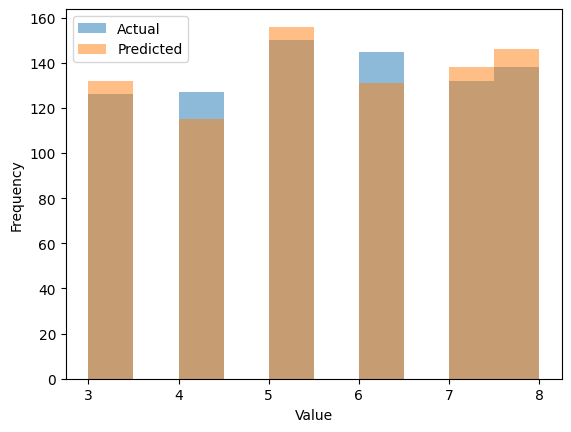

In [ ]:
# @title Distribution of Actual vs Predicted

import matplotlib.pyplot as plt
plt.hist(df_predict["Actual"], alpha=0.5, label="Actual")
plt.hist(df_predict["Predicted"], alpha=0.5, label="Predicted")
plt.xlabel("Value")
plt.ylabel("Frequency")
_ = plt.legend()

In [13]:
acc_per = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc_per*100))+'%')

Model Accuracy : 76%


In [14]:
model2 = RandomForestClassifier(n_estimators=120,random_state=0)
model2.fit(x_train,y_train)
RandomForestClassifier(n_estimators=120, random_state=0)
pred2 = model2.predict(x_test)
df_predict2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred2})
df_predict2.head(70)

,Actual,Predicted
3226,7,7
2226,3,3
2506,4,4
1947,3,3
3238,7,7
...,...,...
2406,4,4
567,6,3
4081,8,8
3775,8,8


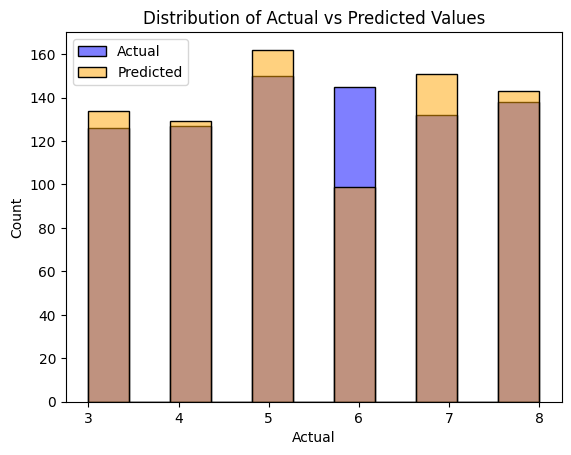

In [ ]:
# @title Distribution of Actual vs Predicted Values

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df_predict2, x="Actual", color="blue", alpha=0.5, label="Actual")
sns.histplot(data=df_predict2, x="Predicted", color="orange", alpha=0.5, label="Predicted")
plt.title("Distribution of Actual vs Predicted Values")
_ = plt.legend()

In [ ]:

acc_per2 = accuracy_score(y_test,pred2)
print('Model Accuracy : '+ str(round(acc_per2*100,4)))

Model Accuracy : 86.4303


In [15]:
cross_validation = cross_val_score(model2,x_res,y_res,cv=5)
print('Cross validations mean score ',round(np.mean(cross_validation)*100,4))

Cross validations mean score  80.6897


In [ ]:
print("Recall Score :",recall_score(y_test, pred2, average='weighted'))
print("Percision Score :",precision_score(y_test, pred2, average='weighted'))
print("F1 Score :",f1_score(y_test, pred2, average='weighted'))

Recall Score : 0.8643031784841075
Percision Score : 0.8581906010650394
F1 Score : 0.8584753580726046


In [ ]:
model_xgb = XGBClassifier(random_state=0)
model.fit(x_train,y_train)
pred_xgb = model.predict(x_test)
df_predict_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': pred_xgb})
print(df_predict_xgb.head(10))

      Actual  Predicted
3226       7          7
2226       3          3
2506       4          3
1947       3          3
3238       7          7
3540       8          8
3790       8          8
735        5          5
3754       8          8
979        5          5


In [ ]:
acc_per = accuracy_score(y_test,pred)
print('Model Accuracy : '+ str(round(acc_per*100,4)))

Model Accuracy : 78.2396


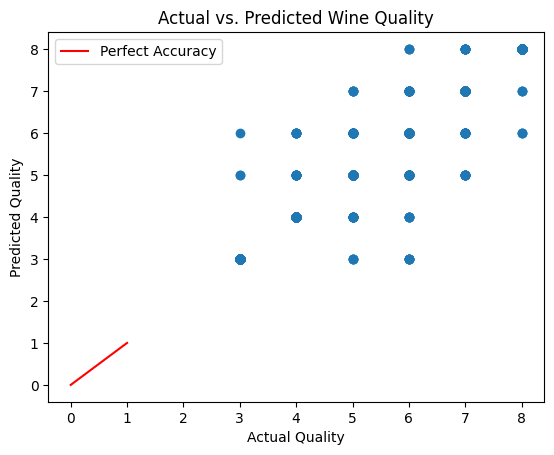

In [18]:

plt.scatter(y_test, pred)

# Add a diagonal line for perfect accuracy
plt.plot([0, 1], [0, 1], 'r-', label='Perfect Accuracy')

# Label the axes
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

# Add title and legend
plt.title('Actual vs. Predicted Wine Quality')
plt.legend()

# Show the plot
plt.show()


In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.